<div align="center">

# 👋 Hi, I'm **Ashish Mishra**  
## 📊 **Internship in Data Science**  
### 🏢 at **ShadowFox**

</div>


### <B>Cricket Fielding Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r'C:\Users\Ashish Mishra\OneDrive\Desktop\ShadowFox\Shadowfox_DS\Advanced\IPL sample data.xlsx')

In [3]:
df.head()

,Pick,Y->,Clean Pick,N->,Fumble,C->,Catch,DC->,Dropped Catch,S->,Stumping,Unnamed: 11,Unnamed: 12
0,Throw,Y->,Good Throw,N->,Bad throw,DH->,Dirct Hit,RO->,Run Out,MR->,Missed Runout,NaN,NaN
1,Runs,"""+"" stands for runs saved ""-"" stands for runs ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Match No.,Innings,Teams,Player Name,BallCount,Position,Pick,Throw,Runs,Overcount,Venue,Stadium
4,NaN,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,NaN,1,1,Delhi,Arun Jaitly Stadium


In [4]:
# Reload the dataset with a specific skiprows parameter to better clean and structure the table
data_refined = pd.read_excel(r"C:\Users\Ashish Mishra\OneDrive\Desktop\ShadowFox\Shadowfox_DS\Advanced\IPL sample data.xlsx", sheet_name='Sheet1', skiprows=3)

# Rename columns based on their actual meaning and drop any unnecessary columns
data_refined.columns = [
    'Pick',
    'Match_No',
    'Innings',
    'Team',
    'Player_Name',
    'BallCount',
    'Position',
    'Pick_Type',
    'Throw_Type',
    'Runs',
    'Overcount',
    'Venue',
    'Stadium'
]

# Convert numeric fields (e.g., Runs, BallCount) to appropriate data types
data_refined['Runs'] = pd.to_numeric(data_refined['Runs'], errors='coerce').fillna(0)
data_refined['BallCount'] = pd.to_numeric(data_refined['BallCount'], errors='coerce')

# Display the cleaned and structured dataset
data_refined.head()


,Pick,Match_No,Innings,Team,Player_Name,BallCount,Position,Pick_Type,Throw_Type,Runs,Overcount,Venue,Stadium
0,NaN,Match No.,Innings,Teams,Player Name,NaN,Position,Pick,Throw,0.0,Overcount,Venue,Stadium
1,NaN,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,NaN,1.0,1,Delhi,Arun Jaitly Stadium
2,NaN,IPL2367,1,Delhi Capitals,Phil Salt,0.2,wicket keeper,Y,Y,0.0,1,Delhi,Arun Jaitly Stadium
3,NaN,IPL2367,1,Delhi Capitals,Yash Dhull,0.3,covers,Y,Y,0.0,1,Delhi,Arun Jaitly Stadium
4,NaN,IPL2367,1,Delhi Capitals,Axer Patel,0.4,point,Y,Y,0.0,1,Delhi,Arun Jaitly Stadium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pick           2 non-null      object
 1   Y->            31 non-null     object
 2   Clean Pick     54 non-null     object
 3   N->            22 non-null     object
 4   Fumble         19 non-null     object
 5   C->            22 non-null     object
 6   Catch          19 non-null     object
 7   DC->           19 non-null     object
 8   Dropped Catch  16 non-null     object
 9   S->            11 non-null     object
 10  Stumping       22 non-null     object
 11  Unnamed: 11    21 non-null     object
 12  Unnamed: 12    13 non-null     object
dtypes: object(13)
memory usage: 7.6+ KB


In [6]:
# Drop rows where essential columns like 'Player_Name' or 'Position' are NaN
data_refined.dropna(subset=['Player_Name', 'Position'], inplace=True)

# Convert numeric fields (e.g., Runs, BallCount) to appropriate data types
data_refined['Runs'] = pd.to_numeric(data_refined['Runs'], errors='coerce').fillna(0)
data_refined['BallCount'] = pd.to_numeric(data_refined['BallCount'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pick           2 non-null      object
 1   Y->            31 non-null     object
 2   Clean Pick     54 non-null     object
 3   N->            22 non-null     object
 4   Fumble         19 non-null     object
 5   C->            22 non-null     object
 6   Catch          19 non-null     object
 7   DC->           19 non-null     object
 8   Dropped Catch  16 non-null     object
 9   S->            11 non-null     object
 10  Stumping       22 non-null     object
 11  Unnamed: 11    21 non-null     object
 12  Unnamed: 12    13 non-null     object
dtypes: object(13)
memory usage: 7.6+ KB


In [8]:
weights = {
    'CP': 1.5,  # Clean Picks
    'GT': 1.2,  # Good Throws
    'C': 2.0,   # Catches
    'DC': -1.0, # Dropped Catches
    'ST': 2.5,  # Stumpings
    'RO': 3.0,  # Run Outs
    'MRO': -0.5, # Missed Run Outs
    'DH': 2.0,  # Direct Hits
    'RS': 1.0   # Runs Saved
}


In [9]:
# Initialize a performance score column
data_refined['Performance Score'] = 0

# Calculate the performance score for each player
data_refined['Performance Score'] = (
    data_refined['Pick_Type'].apply(lambda x: weights['CP'] if x == 'Y' else 0) +
    data_refined['Throw_Type'].apply(lambda x: weights['GT'] if x == 'Y' else 0) +
    data_refined['Runs'] * weights['RS']
)

# Group by player and calculate total performance scores
top_players = data_refined[['Player_Name', 'Performance Score', 'Match_No', 'Innings', 'Team', 'Position', 'Venue']]
top_players_grouped = top_players.groupby('Player_Name').agg({
    'Performance Score': 'sum',
    'Match_No': 'first',
    'Innings': 'first',
    'Team': 'first',
    'Position': 'first',
    'Venue': 'first'
}).sort_values(by='Performance Score', ascending=False)

# Display top performers
top_3_players = top_players_grouped.head(3)
print("Top 3 Performers with Details:\n", top_3_players)

Top 3 Performers with Details:
                Performance Score       Match_No Innings            Team  \
Player_Name                                                               
Kuldeep yadav                4.2        IPL2367       1  Delhi Capitals   
Lalit yadav                  4.2        IPL2367       1  Delhi Capitals   
1                            3.0  Rilee russouw       2               1   

                       Position  Venue  
Player_Name                             
Kuldeep yadav  Short mid wicket  Delhi  
Lalit yadav         cover point  Delhi  
1                             0     10  


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

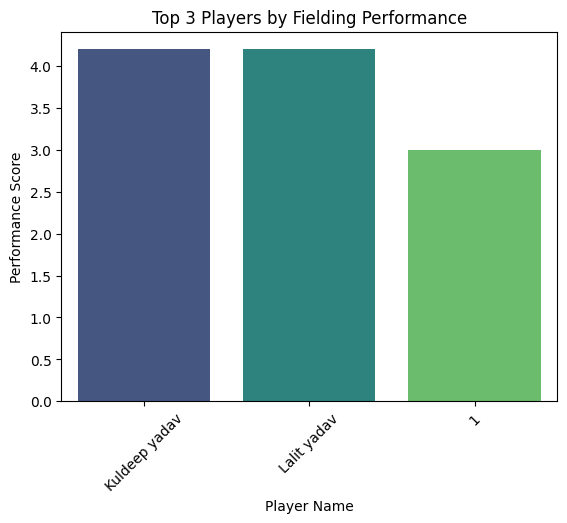

In [11]:
sns.barplot(x=top_3_players.index, y=top_3_players['Performance Score'], hue=top_3_players.index, dodge=False, palette='viridis', legend=False)
plt.title('Top 3 Players by Fielding Performance')
plt.xlabel('Player Name')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)
plt.show()